<a href="https://colab.research.google.com/github/akr1139/Neural-network-and-fuzzy-systems-CO542/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sbn
#from sklearn.metrics import plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df =pd.read_excel("/content/drive/MyDrive/CO 542/lab 5 23 10 20/Concrete_Data.xls")

In [ ]:
#seperate features and labels
features = df.iloc[:, 0:4]
labels = df.iloc[:, 4:5]

print(features)
print(labels)

      Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...      

In [ ]:
#convert labels into numerical data
leb_enc = LabelEncoder()
leb_enc.fit(labels)
labels = leb_enc.transform(labels)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:99: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:134: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


In [ ]:
# 2  another method

feature_cols = ['Cement (component 1)(kg in a m^3 mixture)',
                'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
                'Fly Ash (component 3)(kg in a m^3 mixture)',
                'Water  (component 4)(kg in a m^3 mixture)',
                'Superplasticizer (component 5)(kg in a m^3 mixture)',
                'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
                'Fine Aggregate (component 7)(kg in a m^3 mixture)',
                'Age (day)']

features = df[feature_cols]
labels = df['Concrete compressive strength(MPa, megapascals) ']





print(features)
print(labels)



      Cement (component 1)(kg in a m^3 mixture)  \
0                                         540.0   
1                                         540.0   
2                                         332.5   
3                                         332.5   
4                                         198.6   
...                                         ...   
1025                                      276.4   
1026                                      322.2   
1027                                      148.5   
1028                                      159.1   
1029                                      260.9   

      Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                   0.0       
1                                                   0.0       
2                                                 142.5       
3                                                 142.5       
4                                                 132.4       
...      

In [ ]:
# 3
from sklearn.model_selection import train_test_split

#split data into test and train
x_train, x_test, y_train, y_test = train_test_split(features,labels, train_size=0.9, test_size=0.1, random_state=1)


In [ ]:
#4
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scl = scaler.fit_transform(x_train)
x_test_scl = scaler.transform(x_test)

x_train_scl
x_test_scl


array([[ 1.55987842e-01, -8.44437899e-01,  9.95335551e-01,
        -3.24097118e-01,  5.74779472e-01,  6.52159463e-01,
        -2.76912156e-01, -6.88731324e-01],
       [-4.06317781e-01, -8.44437899e-01,  6.29771733e-01,
         2.36515953e-01,  1.50671694e-01, -2.95359321e-01,
         9.05391195e-01, -6.88731324e-01],
       [-1.33905448e+00,  6.93732824e-01,  7.68476912e-01,
         8.67087485e-01,  1.50671694e-01, -7.36165494e-01,
        -2.82598737e-01, -2.78276714e-01],
       [-7.34987368e-01,  7.24958846e-01, -8.38568469e-01,
         1.91137492e-01, -1.02740547e+00,  1.34632194e+00,
        -2.02986605e-01, -6.23058586e-01],
       [-1.12977139e+00,  1.54955714e+00,  1.84504129e+00,
         1.62339517e+00,  6.55561906e-01, -1.95809945e+00,
        -1.73583608e+00, -2.78276714e-01],
       [-3.39841306e-02,  2.86869320e-01, -4.56934197e-01,
        -9.90593264e-01,  8.55835023e-01,  1.15783213e+00,
         8.96827585e-02,  9.03832564e-01],
       [ 5.55908809e-01, -8.444378

In [ ]:
# 5. Model the MLP using MLPRegressor (Use hidden layers as (256,128,64,32))
# define the MLP and train

from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(256, 128, 64, 32), activation='logistic', max_iter=300, random_state=1)

In [ ]:
#6   Train the model
mlp.fit(x_train_scl, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(activation='logistic', hidden_layer_sizes=(256, 128, 64, 32),
             max_iter=300, random_state=1)

In [ ]:
# 7. Find the predicted concrete compressive strength for previously reserved test data sets and find the accuracy of the test set.

y_pred = mlp.predict(x_test_scl)

print(mlp.score(x_test_scl, y_pred))

1.0


In [ ]:
# 8. Do a cross validation for this model. Use the number of folds as 5
from sklearn.model_selection import cross_val_score

cross_val_scores = cross_val_score(mlp, x_train_scl, y_train, cv=5)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

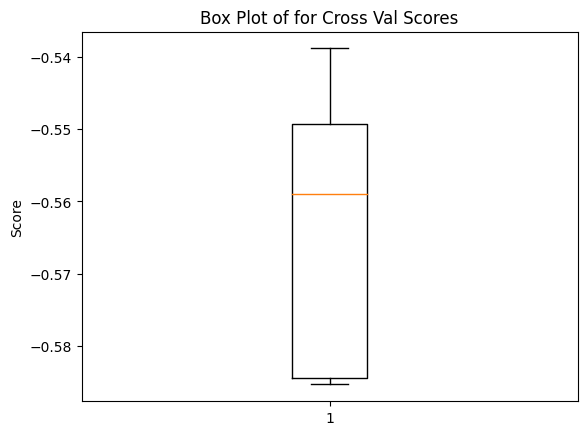

In [ ]:
# 9. Plot the data using matplotlib.pyplot.boxplot
import matplotlib.pyplot as plt

plt.boxplot(cross_val_scores)
plt.title("Box Plot of for Cross Val Scores")
plt.ylabel("Score")
plt.show()